# Subject of the Project

The dataset is primarily used for predicting the onset of diabetes within five years in females of Pima Indian heritage over the age of 21 given medical details about their bodies. The dataset is meant to correspond with a binary (2-class) classification machine learning problem. 

We have a dependent variable that indicates the state of having diabetes. Our goal is to model the relationship between other variables and whether or not they have diabetes.

When the various features of the people are entered, we want to establish a machine learning model that will make a prediction about whether these people will have diabetes or not. This is a classification problem.

## Dataset Information

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

We have 9 columns and 768 instances (rows). The column names are provided as follows (in order):

    - Pregnancies: Number of times pregnant
    - Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
    - BloodPressure: Diastolic blood pressure (mm Hg)
    - SkinThickness: Triceps skinfold thickness (mm)
    - Insulin: 2-Hour serum insulin measurement (mu U/ml)
    - BMI: Body mass index (weight in kg/(height in m) 2 )
    - DiabetesPedigreeFunction: Diabetes pedigree function
    - Age: Age (years)
    - Outcome: Class variable (0 or 1, 0 = non-diabetic, 1 = diabetic)

# Data Understanding

In [3]:
#installation of libraries
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold

In [4]:
#any warnings that do not significantly impact the project are ignored.
import warnings
warnings.simplefilter(action = "ignore") 

In [5]:
#Reading the dataset
df = pd.read_csv("diabetes.csv")
#selection of the first 5 observations
df.head() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
#return a random sample of items from an axis of object
df.sample(3) 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
62,5,44,62,0,0,25.0,0.587,36,0
369,1,133,102,28,140,32.8,0.234,45,1
270,10,101,86,37,0,45.6,1.136,38,1


In [7]:
#makes random selection from dataset at the rate of written value
df.sample(frac = 0.01) 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
397,0,131,66,40,0,34.3,0.196,22,1
570,3,78,70,0,0,32.5,0.270,39,0
130,4,173,70,14,168,29.7,0.361,33,1
466,0,74,52,10,36,27.8,0.269,22,0
63,2,141,58,34,128,25.4,0.699,24,0
293,1,128,48,45,194,40.5,0.613,24,1
342,1,0,68,35,0,32.0,0.389,22,0
35,4,103,60,33,192,24.0,0.966,33,0


In [8]:
#size information
df.shape

(768, 9)

In [9]:
#dataframe's index dtype and column dtypes, non-null values and memory usage information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
#explanatory statistics values of the observation units corresponding to the specified percentages
df.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99]).T
#transposition of the df table. This makes it easier to evaluate.

,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.000,1.00000,3.0000,6.00000,9.0000,10.00000,13.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,85.000,99.00000,117.0000,140.25000,167.0000,181.00000,196.00000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,54.000,62.00000,72.0000,80.00000,88.0000,90.00000,106.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.000,0.00000,23.0000,32.00000,40.0000,44.00000,51.33000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.000,0.00000,30.5000,127.25000,210.0000,293.00000,519.90000,846.00
BMI,768.0,31.992578,7.884160,0.000,23.600,27.30000,32.0000,36.60000,41.5000,44.39500,50.75900,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.165,0.24375,0.3725,0.62625,0.8786,1.13285,1.69833,2.42
Age,768.0,33.240885,11.760232,21.000,22.000,24.00000,29.0000,41.00000,51.0000,58.00000,67.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000,0.00000,0.0000,1.00000,1.0000,1.00000,1.00000,1.00


In [11]:
#correlation between variables
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Our eventual goal is to exploit patterns in our data in order to predict the onset of diabetes. Visualize some of the differences between those that developed diabetes and those that did not. 

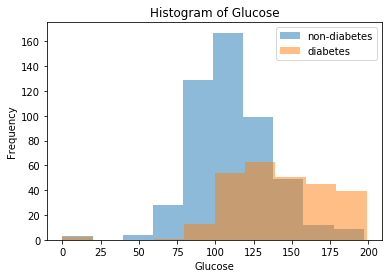

In [12]:
# get a histogram of the plasma_glucose_concentration column for
# both classes

col = 'Glucose'
plt.hist(df[df['Outcome']==0][col], 10, alpha=0.5, label='non-diabetes')
plt.hist(df[df['Outcome']==1][col], 10, alpha=0.5, label='diabetes')
plt.legend(loc='upper right')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.title('Histogram of {}'.format(col))
plt.show()


It seems that this histogram is showing us a pretty big difference between Glucose and two prediction classes.

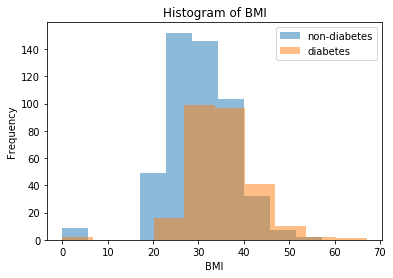

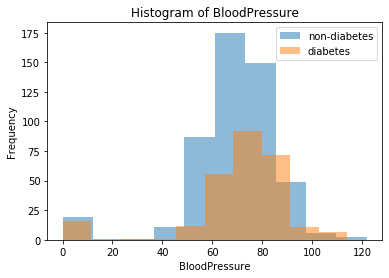

In [13]:
for col in ['BMI', 'BloodPressure']:
    plt.hist(df[df['Outcome']==0][col], 10, alpha=0.5, label='non-diabetes')
    plt.hist(df[df['Outcome']==1][col], 10, alpha=0.5, label='diabetes')
    plt.legend(loc='upper right')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title('Histogram of {}'.format(col))
    plt.show()

These histograms show us the distributions of 'BMI', 'BloodPressure', 'Glucose' for the two class variables (non-diabetes and diabetes).

There seems to be a large jump in 'Glucose' for those who will eventually develop diabetes. To solidify this, we can visualize correlation matrix in an attempt to quantify the relationship between these variables. 

In [14]:
def plot_corr(df,size = 9): 
    corr = df.corr() #corr = variable, where we assign the correlation matrix to a variable
    fig, ax = plt.subplots(figsize = (size,size)) 
    #fig = the column to the right of the chart, subplots (figsize = (size, size)) = determines the size of the chart
    ax.matshow(corr) # prints the correlation, which draws the matshow matrix directly
    cax=ax.matshow(corr, interpolation = 'nearest') #plotting axis, code that makes the graphic like square or map
    fig.colorbar(cax) #plotting color
    plt.xticks(range(len(corr.columns)),corr.columns,rotation=65) 
    # draw xticks, rotation = 17 is for inclined printing of expressions written for each top column
    plt.yticks(range(len(corr.columns)),corr.columns) #draw yticks

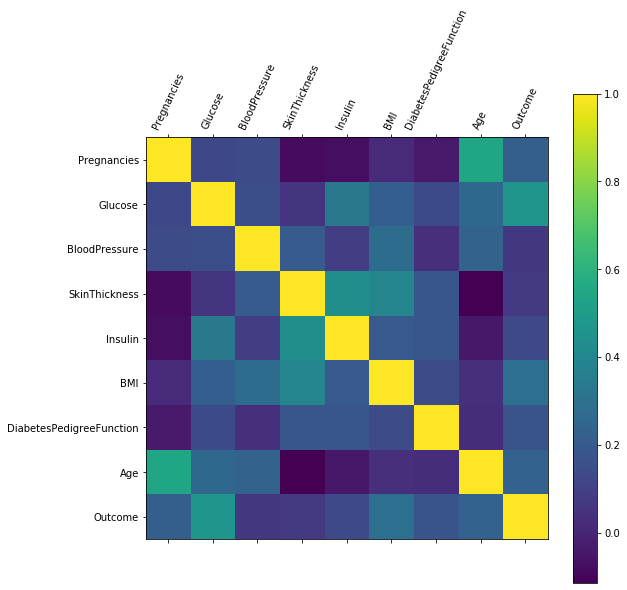

In [15]:
plot_corr(df) #we draw the dataframe using the function.

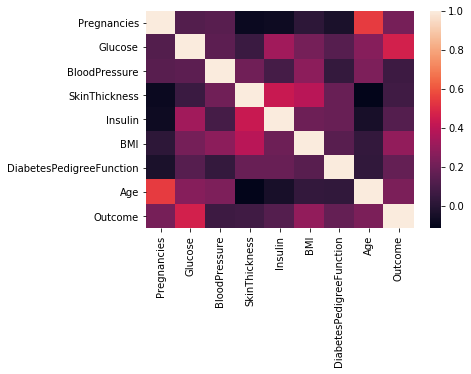

In [16]:
#correlation matrix in seaborn library
import seaborn as sb
sb.heatmap(df.corr());

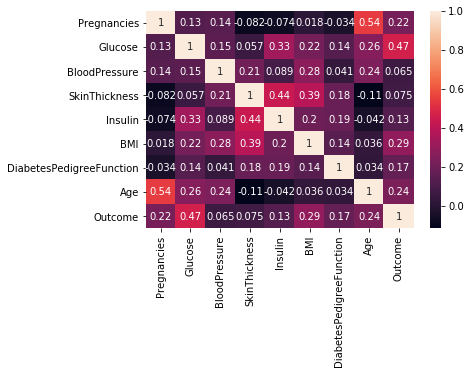

In [17]:
#this way we can see the correlations
sb.heatmap(df.corr(),annot =True); 

Conclusion: The highest correlations with Outcome were observed between Glucose, BMI, Age and Pregnancies.

In [18]:
#proportions of classes 0 and 1 in Outcome
df["Outcome"].value_counts()*100/len(df)

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

In [19]:
#how many classes are 0 and 1
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

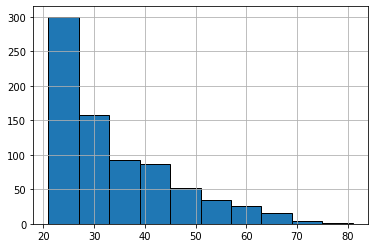

In [20]:
#histogram of the Age variable
df["Age"].hist(edgecolor = "black");

In [21]:
#Age, Glucose and BMI means according to Outcome variable
df.groupby("Outcome").agg({"Age":"mean","Glucose":"mean","BMI":"mean"})

,Age,Glucose,BMI
Outcome,,,
0,31.190000,109.980000,30.304200
1,37.067164,141.257463,35.142537


# Data Pre-Processing

## Missing Data Analysis

In [22]:
#no missing data in dataset
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [23]:
#zeros in the corresponding variables mean NA, so 0 is assigned instead of NA
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, np.NaN)

It seems that there is no missing value in the data set, but when the variables are examined, the zeros in these variables represent NA.

In [24]:
#exclusive values
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [25]:
def median_target(var):   
    
    temp = df[df[var].notnull()] 
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index() #reset_index; solved problems in indices
    
    return temp
#Non-nulls are selected from within df and assigned to a dataframe named temp, ignoring the observation units filled.

Independent and dependent variable selected from dataframe, groupby operation is applied to the dependent variable then the independent variable is selected and the median of this variable is taken.

In [26]:
#median of glucose taken according to Outcome's value of 0 and 1
median_target("Glucose")

,Outcome,Glucose
0,0,107.0
1,1,140.0


In [27]:
#median values of diabetes and non-diabetes were given for incomplete observations.

columns = df.columns

columns = columns.drop("Outcome")

for col in columns:
    
    df.loc[(df['Outcome'] == 0 ) & (df[col].isnull()), col] = median_target(col)[col][0]
    df.loc[(df['Outcome'] == 1 ) & (df[col].isnull()), col] = median_target(col)[col][1]
    #select the outcome value 0 and the relevant variable blank, select the relevant variable
#It refers to pre-comma filtering operations, it is used for column selection after comma.

## Feature Engineering

In [28]:
#according to BMI, some ranges were determined and categorical variables were assigned.
NewBMI = pd.Series(["Underweight", "Normal", "Overweight", "Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")

df["NewBMI"] = NewBMI

df.loc[df["BMI"] < 18.5, "NewBMI"] = NewBMI[0]

df.loc[(df["BMI"] > 18.5) & (df["BMI"] <= 24.9), "NewBMI"] = NewBMI[1]
df.loc[(df["BMI"] > 24.9) & (df["BMI"] <= 29.9), "NewBMI"] = NewBMI[2]
df.loc[(df["BMI"] > 29.9) & (df["BMI"] <= 34.9), "NewBMI"] = NewBMI[3]
df.loc[(df["BMI"] > 34.9) & (df["BMI"] <= 39.9), "NewBMI"] = NewBMI[4]
df.loc[df["BMI"] > 39.9 ,"NewBMI"] = NewBMI[5]

In [29]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3


In [30]:
#Categorical variable creation according to the insulin value
def set_insulin(row):
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal"     

In [31]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3


In [32]:
#NewInsulinScore variable added with set_insulin
df["NewInsulinScore"] = df.apply(set_insulin, axis=1)

In [33]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1,Abnormal
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,Normal
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal,Abnormal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Abnormal


In [34]:
#some intervals were determined according to the glucose variable and these were assigned categorical variables.

NewGlucose = pd.Series(["Low", "Normal", "Overweight", "Secret", "High"], dtype = "category")

df["NewGlucose"] = NewGlucose

df.loc[df["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]

df.loc[(df["Glucose"] > 70) & (df["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]

df.loc[(df["Glucose"] > 99) & (df["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]

df.loc[df["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]

In [35]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore,NewGlucose
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1,Abnormal,Secret
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,Normal,Normal
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal,Abnormal,Secret
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Abnormal,Secret


## One-Hot Encoding

In [36]:
#categorical variables were converted into numerical values by making One Hot Encoding transform
#it is also protected from the Dummy variable trap
df = pd.get_dummies(df, columns =["NewBMI","NewInsulinScore", "NewGlucose"], drop_first = True)

In [37]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,1,0,0,0,0,0,0,0,0,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,0,0,0,1,0,1,0,1,0,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,0,0,0,0,0,0,0,0,0,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,0,0,0,1,0,1,0,1,0,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0,0,1,0,0,0,0,0,0,1


## Variable Standardization

In [38]:
#categorical variables
categorical_df = df[['NewBMI_Obesity 1','NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight','NewBMI_Underweight',
                     'NewInsulinScore_Normal','NewGlucose_Low','NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret']]

In [39]:
#categorical variables deleted from df
y = df["Outcome"]
X = df.drop(["Outcome",'NewBMI_Obesity 1','NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight','NewBMI_Underweight',
                     'NewInsulinScore_Normal','NewGlucose_Low','NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'], axis = 1)
cols = X.columns
index = X.index

In [40]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [41]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [42]:
#by standardizing the variables in the dataset, the performance of the models is increased.
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
X = transformer.transform(X)
X = pd.DataFrame(X, columns = cols, index = index)

In [43]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.6,0.765432,0.000,1.000000,1.000000,0.170330,0.665359,1.235294
1,-0.4,-0.790123,-0.375,0.142857,0.000000,-0.598901,-0.056209,0.117647
2,1.0,1.629630,-0.500,0.571429,1.000000,-0.961538,0.783007,0.176471
3,-0.4,-0.691358,-0.375,-0.714286,-0.126866,-0.434066,-0.537255,-0.470588
4,-0.6,0.493827,-2.000,1.000000,0.977612,1.214286,5.007843,0.235294


In [44]:
#combining non-categorical and categorical variables
X = pd.concat([X, categorical_df], axis = 1)

In [45]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,0.6,0.765432,0.000,1.000000,1.000000,0.170330,0.665359,1.235294,1,0,0,0,0,0,0,0,0,1
1,-0.4,-0.790123,-0.375,0.142857,0.000000,-0.598901,-0.056209,0.117647,0,0,0,1,0,1,0,1,0,0
2,1.0,1.629630,-0.500,0.571429,1.000000,-0.961538,0.783007,0.176471,0,0,0,0,0,0,0,0,0,1
3,-0.4,-0.691358,-0.375,-0.714286,-0.126866,-0.434066,-0.537255,-0.470588,0,0,0,1,0,1,0,1,0,0
4,-0.6,0.493827,-2.000,1.000000,0.977612,1.214286,5.007843,0.235294,0,0,1,0,0,0,0,0,0,1


# Modeling

LR: 0.847539 (0.032028)
KNN: 0.837235 (0.031427)
CART: 0.838602 (0.026456)
RF: 0.878947 (0.030074)
SVM: 0.848855 (0.035492)
XGB: 0.880297 (0.029243)
LightGBM: 0.885526 (0.035487)


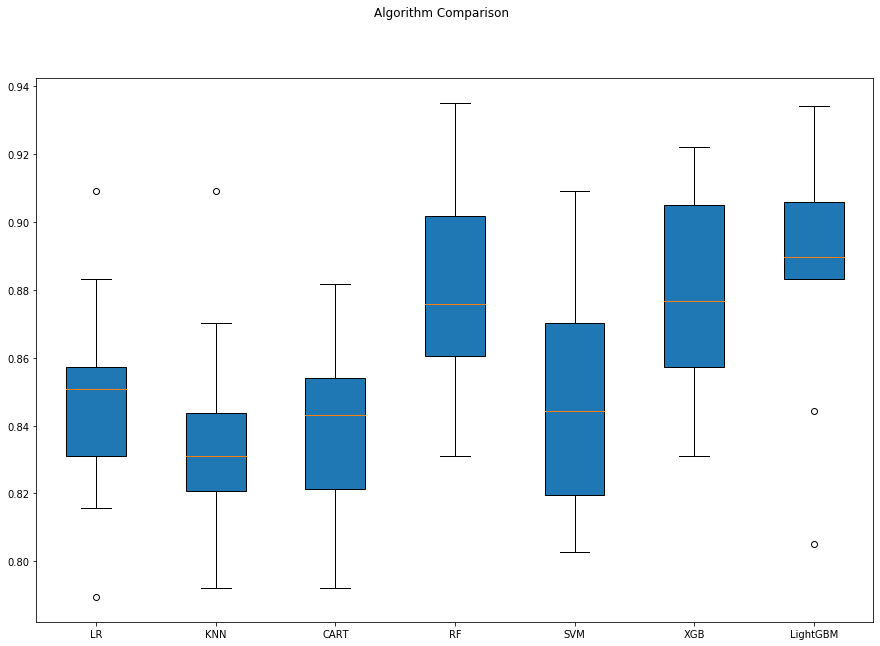

In [65]:
models = []
models.append(('LR', LogisticRegression(random_state = 12345)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state = 12345)))
models.append(('RF', RandomForestClassifier(random_state = 12345)))
models.append(('SVM', SVC(gamma='auto', random_state = 12345)))
models.append(('XGB', GradientBoostingClassifier(random_state = 12345)))
models.append(("LightGBM", LGBMClassifier(random_state = 12345)))

# evaluate each model in turn
results = []
names = []

for name, model in models:
        
        cv_results = cross_val_score(model, X, y, cv = 10, scoring= "accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results,
            vert=True, #vertical box alignment
            patch_artist=True) #fill with color
                         
ax.set_xticklabels(names)
plt.show()

RF, XGB and LightGBM gave good results. We focused on optimizing these models

# Model Optimization

## Model Tuning

### Random Forests Tuning

In [190]:
rf_params = {"n_estimators" :[100,200,500,1000], 
             "max_features": [3,5,7], 
             "min_samples_split": [2,5,10,30],
            "max_depth": [3,5,8,None]}

In [191]:
rf_model = RandomForestClassifier(random_state = 12345)

In [192]:
gs_cv = GridSearchCV(rf_model, 
                    rf_params,
                    cv = 10,
                    n_jobs = -1,
                    verbose = 2).fit(X, y)


Fitting 10 folds for each of 192 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 18.2min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 26.0min
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed: 34.0min finished


In [193]:
gs_cv.best_params_

{'max_depth': None,
 'max_features': 7,
 'min_samples_split': 5,
 'n_estimators': 500}

### Final Model Installation

In [53]:
rf_tuned = RandomForestClassifier(**gs_cv.best_params_)

In [54]:
rf_tuned = rf_tuned.fit(X,y)

In [55]:
cross_val_score(rf_tuned, X, y, cv = 10).mean()

0.886790840738209

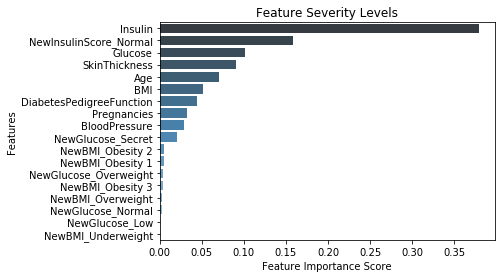

In [56]:
feature_imp = pd.Series(rf_tuned.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index, palette="Blues_d")
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Feature Severity Levels")
plt.show()

### LightGBM Tuning

In [57]:
lgbm = LGBMClassifier(random_state = 12345)

In [58]:
lgbm_params = {"learning_rate": [0.01, 0.03, 0.05, 0.1, 0.5],
              "n_estimators": [500, 1000, 1500],
              "max_depth":[3,5,8]}

In [59]:
gs_cv = GridSearchCV(lgbm, 
                     lgbm_params, 
                     cv = 10, 
                     n_jobs = -1, 
                     verbose = 2).fit(X, y)

Fitting 10 folds for each of 45 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:  4.3min finished


In [60]:
gs_cv.best_params_

{'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 500}

### Final Model Installation

In [61]:
lgbm_tuned = LGBMClassifier(**gs_cv.best_params_).fit(X,y)

In [62]:
cross_val_score(lgbm_tuned, X, y, cv = 10).mean()

0.8959330143540669

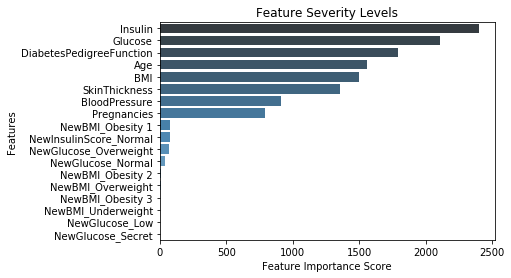

In [63]:
feature_imp = pd.Series(lgbm_tuned.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index, palette="Blues_d")
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Feature Severity Levels")
plt.show()

### XGBoost Tuning

In [74]:
xgb = GradientBoostingClassifier(random_state = 12345)

In [75]:
xgb_params = {
    "learning_rate": [0.01, 0.1, 0.2, 1],
    "min_samples_split": np.linspace(0.1, 0.5, 10),
    "max_depth":[3,5,8],
    "subsample":[0.5, 0.9, 1.0],
    "n_estimators": [100,1000]}

In [76]:
xgb_cv_model  = GridSearchCV(xgb,xgb_params, cv = 10, n_jobs = -1, verbose = 2).fit(X, y)

Fitting 10 folds for each of 720 candidates, totalling 7200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   42.3s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed: 19.3min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 23.6min
[Parallel(n_jobs=-1)]: Done 4893 tasks      | elapsed: 28.7min
[Parallel(n_jobs=-1)]: Done 5824 tasks      | elapsed: 34.5min
[Parallel(n_jobs=-1)]: Done 6837 tasks      | elapsed: 40.9min
[Parallel(n_jobs=-1)]: Done 7200 out of 7200 | elapsed: 43.2min finished


In [77]:
xgb_cv_model.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_split': 0.1,
 'n_estimators': 100,
 'subsample': 1.0}

In [46]:
xgb_cv_model = {'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_split': 0.1,
 'n_estimators': 100,
 'subsample': 1.0}

### Final Model Installation

In [78]:
xgb_tuned = GradientBoostingClassifier(**xgb_cv_model.best_params_).fit(X,y)

In [48]:
cross_val_score(xgb_tuned, X, y, cv = 10).mean()

0.8867566643882434

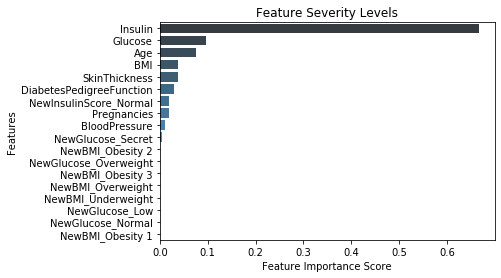

In [49]:
feature_imp = pd.Series(xgb_tuned.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index, palette="Blues_d")
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Feature Severity Levels")
plt.show()

# Comparison of Final Models

In [59]:
models = []

models.append(('RF', RandomForestClassifier(random_state = 12345, max_depth = 8, max_features = 7, min_samples_split = 2, n_estimators = 500)))
models.append(('XGB', GradientBoostingClassifier(random_state = 12345, learning_rate = 0.1, max_depth = 5, min_samples_split = 0.1, n_estimators = 100, subsample = 1.0)))
models.append(("LightGBM", LGBMClassifier(random_state = 12345, learning_rate = 0.01,  max_depth = 3, n_estimators = 1000)))

results = []
names = []

RF: 0.886791 (0.028298)
XGB: 0.886757 (0.021597)
LightGBM: 0.892003 (0.033222)


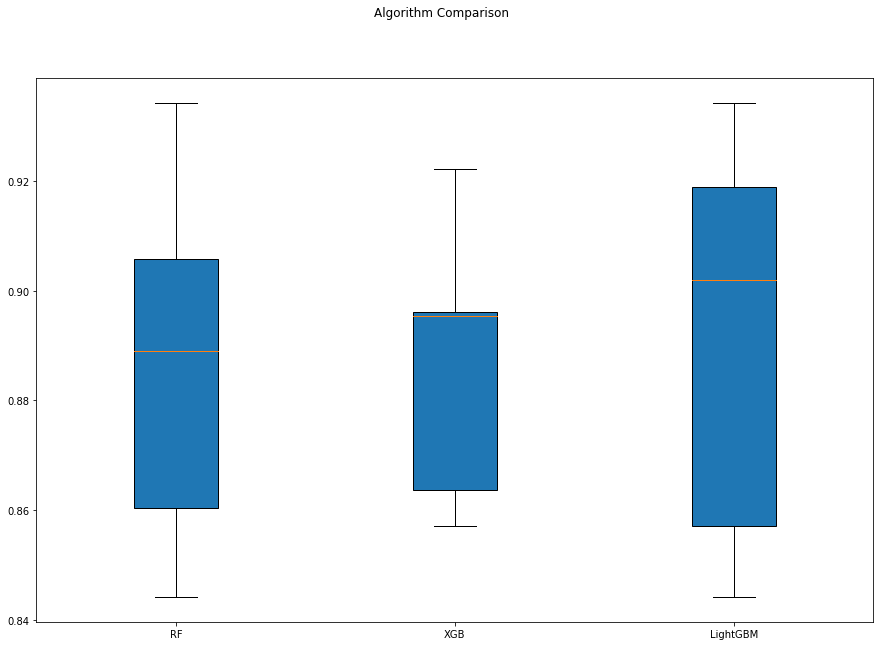

In [60]:
for name, model in models:
    
        cv_results = cross_val_score(model, X, y, cv = 10, scoring= "accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results,
            vert=True, #vertical box alignment
            patch_artist=True) #fill with color
                         
ax.set_xticklabels(names)
plt.show()

# Conclusion

    - Machine learning models were established to predict whether people will have diabetes with varying variables.

    - The 3 classification models that best describe the dataset were selected and these models were compared according to their success rates. Compared models are Random Forests, XGBoost, LightGBM.

    - As a result of this comparison; It is determined that the model that best describes and gives the best results is LightGBM.